In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import cv2
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

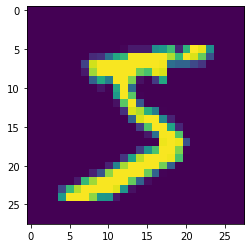

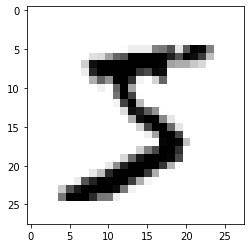

In [ ]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

#NORMALIZING IMAGES BY DIVIDING IMAGES BY 255

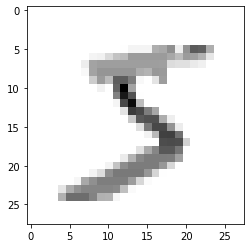

In [ ]:
x_train= tf.keras.utils.normalize(x_train, axis=2)
x_test= tf.keras.utils.normalize(x_test, axis=2)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


#BUILD A CNN ARCHITECTURE

In [ ]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr=np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print("Total training samples",len(x_trainr))

Total training samples 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#Execute the model for appropriate number of epochs

In [ ]:
history=model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 21s 8ms/step - loss: 0.3295 - accuracy: 0.8952 - val_loss: 0.1063 - val_accuracy: 0.9672
Epoch 2/5
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1021 - accuracy: 0.9691 - val_loss: 0.0937 - val_accuracy: 0.9722
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0643 - val_accuracy: 0.9807
Epoch 4/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0715 - val_accuracy: 0.9783
Epoch 5/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0472 - accuracy: 0.9851 - val_loss: 0.0644 - val_accuracy: 0.9798


#Depict loss vs. val_loss and accuracy vs. val_accuracy on line chart

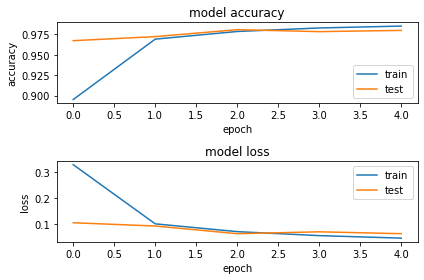

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


#Generating predictions on test_data

In [ ]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss",test_loss)
print("Test Accuracy",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9794
Test loss 0.06471032649278641
Test Accuracy 0.9793999791145325


In [ ]:
predictions=model.predict([x_testr])

In [ ]:
print(predictions)

[[1.9210592e-07 1.4755957e-05 8.2585211e-06 ... 9.9980789e-01
  5.4383310e-08 1.5490819e-04]
 [3.1788830e-05 1.1643572e-06 9.9996006e-01 ... 9.9943259e-07
  6.1380257e-07 7.2164115e-09]
 [3.8147728e-06 9.9872833e-01 8.4808626e-06 ... 1.0216301e-05
  1.1452457e-05 5.1947200e-06]
 ...
 [2.3800512e-08 1.4307537e-06 1.5698664e-07 ... 5.6466220e-08
  2.0216175e-06 4.0987838e-05]
 [2.8609045e-04 3.2560109e-08 3.4631871e-06 ... 6.5247436e-06
  4.1397270e-05 2.2368047e-05]
 [1.8239951e-04 1.8303745e-06 1.0584109e-05 ... 2.2976084e-10
  4.2420135e-05 6.3730681e-06]]


In [ ]:
print(np.argmax(predictions[0]))

7


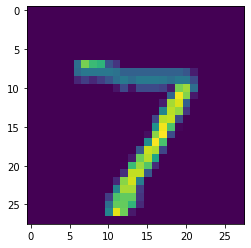

In [ ]:
plt.imshow(x_test[0])

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

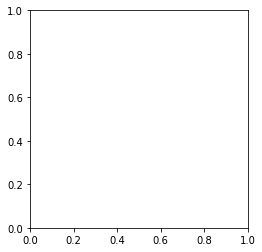

In [ ]:
img=cv2.imread('/content/MNIST_digit.png')
plt.imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

In [ ]:
resized=cv2.resize(gray,(28,28),interpolation= cv2.INTER_AREA)
resized.shape

In [ ]:
ni=tf.keras.utils.normalize (resized, axis=1)
ni=np.array(ni).reshape(-1,IMG_SIZE,IMG_SIZE,1)
ni.shape

In [ ]:
predictions=model.predict(ni)
print(np.argmax(predictions))

#Computing Confusion matrix and classification report

In [ ]:
y_pred = model.predict(x_test)
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)


In [ ]:
print(conf_mat)

In [ ]:
print(classification_report(y_test, y_pred_labels))